In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Function to clean and preprocess the data
def preprocess_data(df):
    # Handle missing values
    df = df.dropna()
    
    # Convert categorical variables to numeric using Label Encoding
    label_encoders = {}
    for column in df.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

    return df, label_encoders

# Load the datasets
mat_data = pd.read_csv('student-mat.csv', sep=';', quotechar='"')
por_data = pd.read_csv('student-por.csv', sep=';', quotechar='"')

# Preprocess both datasets
mat_data_cleaned, mat_label_encoders = preprocess_data(mat_data)
por_data_cleaned, por_label_encoders = preprocess_data(por_data)

# Display the first few rows of the cleaned data
print(mat_data_cleaned.head())
print(por_data_cleaned.head())


   school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  ...  \
0       0    0   18        1        0        0     4     4     0     4  ...   
1       0    0   17        1        0        1     1     1     0     2  ...   
2       0    0   15        1        1        1     1     1     0     2  ...   
3       0    0   15        1        0        1     4     2     1     3  ...   
4       0    0   16        1        0        1     3     3     2     2  ...   

   famrel  freetime  goout  Dalc  Walc  health  absences  G1  G2  G3  
0       4         3      4     1     1       3         6   5   6   6  
1       5         3      3     1     1       3         4   5   5   6  
2       4         3      2     2     3       3        10   7   8  10  
3       3         2      2     1     1       5         2  15  14  15  
4       4         3      2     1     2       5         4   6  10  10  

[5 rows x 33 columns]
   school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob  Fjob  ... 

           school         sex         age     address     famsize     Pstatus  \
count  395.000000  395.000000  395.000000  395.000000  395.000000  395.000000   
mean     0.116456    0.473418   16.696203    0.777215    0.288608    0.896203   
std      0.321177    0.499926    1.276043    0.416643    0.453690    0.305384   
min      0.000000    0.000000   15.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000   16.000000    1.000000    0.000000    1.000000   
50%      0.000000    0.000000   17.000000    1.000000    0.000000    1.000000   
75%      0.000000    1.000000   18.000000    1.000000    1.000000    1.000000   
max      1.000000    1.000000   22.000000    1.000000    1.000000    1.000000   

             Medu        Fedu        Mjob        Fjob  ...      famrel  \
count  395.000000  395.000000  395.000000  395.000000  ...  395.000000   
mean     2.749367    2.521519    2.169620    2.281013  ...    3.944304   
std      1.094735    1.088201    1.227473    0.8

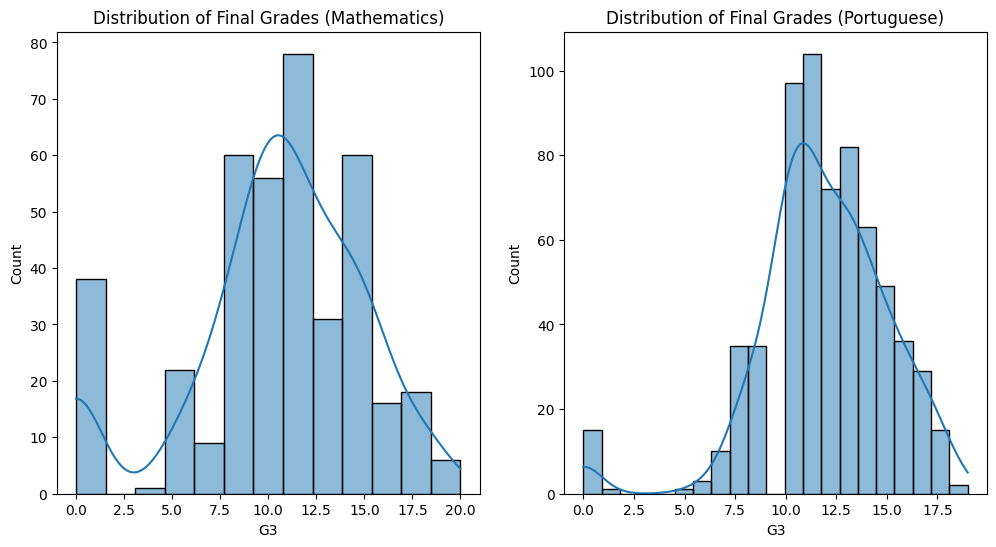

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Describe the datasets
print(mat_data_cleaned.describe())
print(por_data_cleaned.describe())

# Visualize the distribution of final grades
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(mat_data_cleaned['G3'], kde=True)
plt.title('Distribution of Final Grades (Mathematics)')

plt.subplot(1, 2, 2)
sns.histplot(por_data_cleaned['G3'], kde=True)
plt.title('Distribution of Final Grades (Portuguese)')

plt.show()


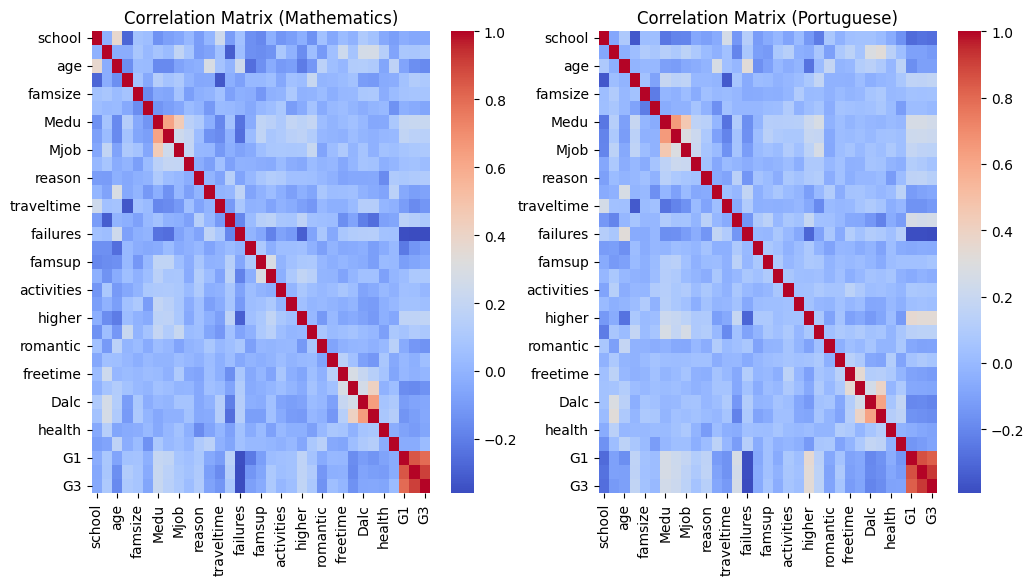

G3            1.000000
G2            0.904868
G1            0.801468
Medu          0.217147
higher        0.182465
Fedu          0.152457
reason        0.121994
address       0.105756
sex           0.103456
Mjob          0.102082
paid          0.101996
internet      0.098483
studytime     0.097820
famsize       0.081407
nursery       0.051568
famrel        0.051363
Fjob          0.042286
absences      0.034247
activities    0.016100
freetime      0.011307
famsup       -0.039157
school       -0.045017
Walc         -0.051939
Dalc         -0.054660
Pstatus      -0.058009
health       -0.061335
guardian     -0.070109
schoolsup    -0.082788
traveltime   -0.117142
romantic     -0.129970
goout        -0.132791
age          -0.161579
failures     -0.360415
Name: G3, dtype: float64
G3            1.000000
G2            0.918548
G1            0.826387
higher        0.332172
studytime     0.249789
Medu          0.240151
Fedu          0.211800
address       0.167637
internet      0.150025
Mjob     

In [3]:
# Compute the correlation matrices
mat_corr = mat_data_cleaned.corr()
por_corr = por_data_cleaned.corr()

# Visualize the correlation matrices
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(mat_corr, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix (Mathematics)')

plt.subplot(1, 2, 2)
sns.heatmap(por_corr, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix (Portuguese)')

plt.show()

# Focus on the correlation with the final grade (G3)
print(mat_corr['G3'].sort_values(ascending=False))
print(por_corr['G3'].sort_values(ascending=False))


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Function to build and evaluate a regression model
def build_and_evaluate_model(df, target):
    X = df.drop(columns=[target])
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'Mean Squared Error: {mse}')
    print(f'R^2 Score: {r2}')

    return model

# Build and evaluate models for both datasets
print('Mathematics:')
mat_model = build_and_evaluate_model(mat_data_cleaned, 'G3')

print('\nPortuguese:')
por_model = build_and_evaluate_model(por_data_cleaned, 'G3')


Mathematics:
Mean Squared Error: 4.5113601478288246
R^2 Score: 0.7947708519011205

Portuguese:
Mean Squared Error: 1.4386095625176465
R^2 Score: 0.8699049941859336


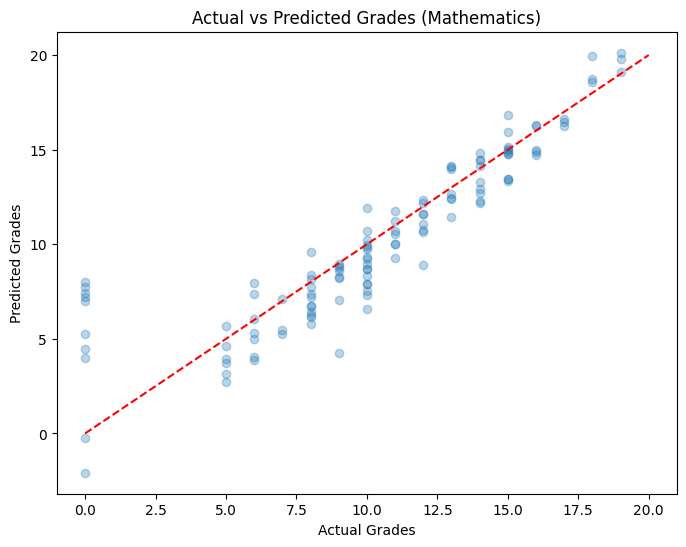

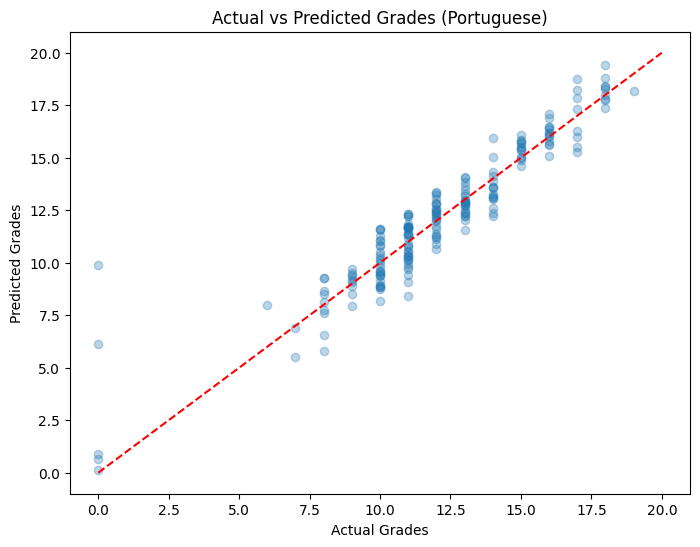

In [5]:
# Visualize actual vs predicted grades
def plot_actual_vs_predicted(model, X_test, y_test, title):
    y_pred = model.predict(X_test)

    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.3)
    plt.plot([0, 20], [0, 20], color='red', linestyle='--')
    plt.xlabel('Actual Grades')
    plt.ylabel('Predicted Grades')
    plt.title(title)
    plt.show()

# Visualize for both models
X_mat = mat_data_cleaned.drop(columns=['G3'])
y_mat = mat_data_cleaned['G3']
X_train_mat, X_test_mat, y_train_mat, y_test_mat = train_test_split(X_mat, y_mat, test_size=0.3, random_state=42)

X_por = por_data_cleaned.drop(columns=['G3'])
y_por = por_data_cleaned['G3']
X_train_por, X_test_por, y_train_por, y_test_por = train_test_split(X_por, y_por, test_size=0.3, random_state=42)

plot_actual_vs_predicted(mat_model, X_test_mat, y_test_mat, 'Actual vs Predicted Grades (Mathematics)')
plot_actual_vs_predicted(por_model, X_test_por, y_test_por, 'Actual vs Predicted Grades (Portuguese)')
